<a href="https://colab.research.google.com/github/sneh20122001/Linear_Regression/blob/main/Polynomial_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200,1) - 3
y = (0.8 * (X**2)) + ((0.9 * X) + (2 + np.random.randn(200,1)))

Text(0, 0.5, 'y')

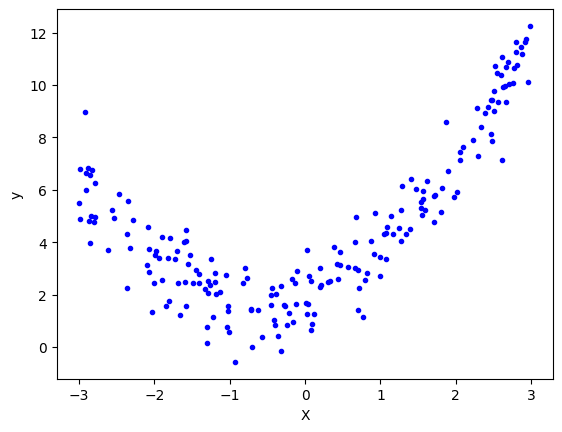

In [4]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
r2_score(y_test,y_pred)

0.4303450725574789

Text(0, 0.5, 'y')

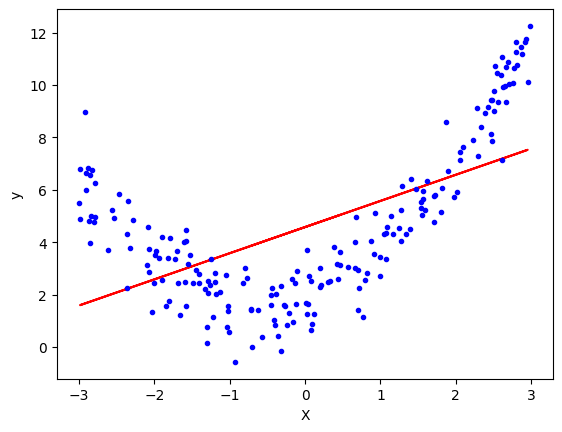

In [13]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')

In [14]:
poly = PolynomialFeatures(degree=2,include_bias=False)

In [15]:
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [16]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test_trans)

In [18]:
r2_score(y_test,y_pred)

0.9079928997880762

In [19]:
lr.coef_

array([[0.93812273, 0.8170035 ]])

In [20]:
lr.intercept_

array([1.98171745])

In [23]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

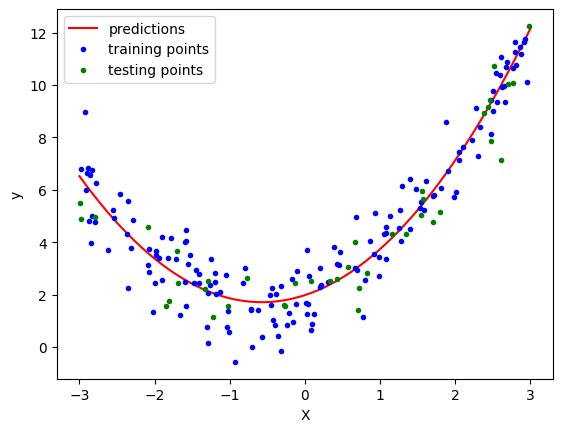

In [24]:
plt.plot(X_new,y_new,'r-',label='predictions')
plt.plot(X_train,y_train,'b.',label='training points')
plt.plot(X_test,y_test,'g.',label='testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()